<a href="https://colab.research.google.com/github/weilainicolas/Deep-Learning/blob/master/fastai_L5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.basics import *

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mnist.pkl.gz to mnist.pkl.gz
User uploaded file "mnist.pkl.gz" with length 16168813 bytes


In [0]:
with gzip.open('/content/mnist.pkl.gz','rb') as f:
  ((x_train,y_train),(x_valid,y_valid),_)=pickle.load(f,encoding='latin-1')

In [0]:
x_train,y_train,x_valid,y_valid=map(torch.tensor,(x_train,y_train,x_valid,y_valid))

In [0]:
train_ds=TensorDataset(x_train,y_train)
valid_ds=TensorDataset(x_valid,y_valid)
data=DataBunch.create(train_ds,valid_ds,bs=64)

In [0]:
x,y=next(iter(data.train_dl))

In [0]:
class log_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1=nn.Linear(784,120,bias=True)
    self.lin2=nn.Linear(120,10,bias=True)
    #self.lin3=nn.Softmax(-1)
  def forward(self, bx):
    x=self.lin1(bx)
    x=F.relu(x)
    #x=self.lin2(x)
    return self.lin2(x)#self.lin3(x)


In [0]:
model=log_model().cuda()

In [13]:
model(x).shape

torch.Size([64, 10])

In [93]:
[p.shape for p in model.parameters()]

[torch.Size([120, 784]),
 torch.Size([120]),
 torch.Size([10, 120]),
 torch.Size([10])]

In [0]:
loss_func=nn.CrossEntropyLoss()

In [0]:
def update(x,y,lr,wd):
  #weight decay
  w2=0
  for p in model.parameters(): w2+= (p**2).sum()
  # add to loss
  loss=loss_func(model(x),y) + w2*wd
  loss.backward()
  with torch.no_grad():
    for p in model.parameters():
      p-=lr*p.grad
      p.grad.zero_()
  return loss.item()


In [0]:
lr=2e-2
wd=1e-5
losses=[update(x,y,lr,wd) for x,y in data.train_dl]

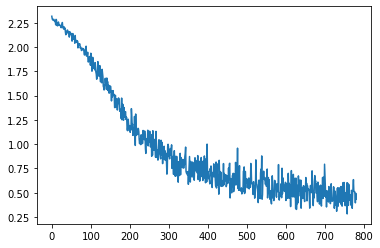

In [116]:
plt.plot(losses)

In [0]:
w2=0
for p in model.parameters(): w2+= (p**2).sum()

In [0]:
valid=[loss_func(model(x),y) + w2*wd for x,y in data.valid_dl]

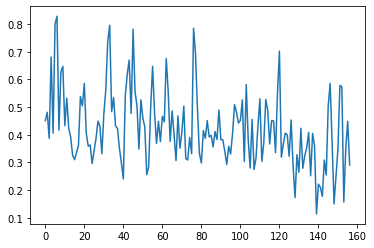

In [120]:
plt.plot(valid)

In [0]:
a,b=next(iter(data.valid_dl))

In [110]:
model(a[1])

tensor([0.0885, 0.1545, 0.0806, 0.1510, 0.0697, 0.0745, 0.0920, 0.0830, 0.1359,
        0.0701], device='cuda:0', grad_fn=<SoftmaxBackward>)

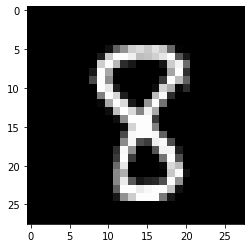

In [111]:
plt.imshow(a[1].reshape((28,28)),cmap='gray')